# CIFAR10 Example

In [6]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

import znrnd as rnd

import tensorflow_datasets as tfds

import numpy as np
from flax import linen as nn
import optax
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

import jax
print(jax.default_backend())

cpu


In [7]:
data_generator = rnd.data.CIFAR10Generator()

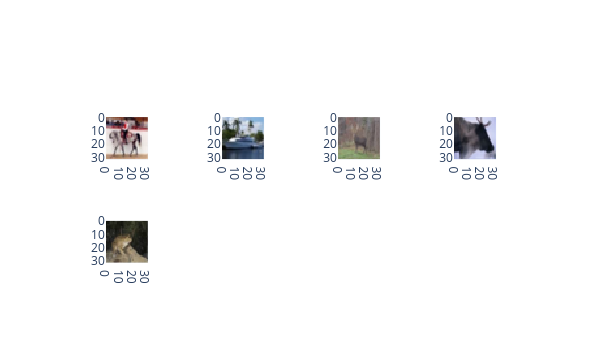

In [8]:
data_generator.plot_image(indices=[0, 1, 2, 3, 4])

In [9]:
class ProductionModule(nn.Module):
    """
    Simple CNN module.
    """

    @nn.compact
    def __call__(self, x):
        x = nn.Conv(features=128, kernel_size=(3, 3))(x)
        x = nn.relu(x)
        x = nn.max_pool(x, window_shape=(3, 3), strides=(2, 2))
        x = nn.Conv(features=128, kernel_size=(3, 3))(x)
        x = nn.relu(x)
        x = nn.max_pool(x, window_shape=(3, 3), strides=(2, 2))
        x = x.reshape((x.shape[0], -1))  # flatten
        x = nn.Dense(features=300)(x)
        x = nn.relu(x)
        x = nn.Dense(10)(x)

        return x

In [13]:
production_model = rnd.models.FlaxModel(
            flax_module=ProductionModule(),
            optimizer=optax.adam(learning_rate=0.01),
            input_shape=(1, 32, 32, 3),
        )

training_strategy = rnd.training_strategies.SimpleTraining(
    model=production_model, 
    loss_fn=rnd.loss_functions.CrossEntropyLoss(),
    accuracy_fn=rnd.accuracy_functions.LabelAccuracy(),
)

In [14]:
batch_wise_training_metrics = training_strategy.train_model(
    train_ds={"inputs": data_generator.train_ds["inputs"], "targets": data_generator.train_ds["targets"]},
    test_ds={"inputs": data_generator.test_ds["inputs"], "targets": data_generator.test_ds["targets"]},
    batch_size=100,
)

Epoch: 50: 100%|█████████████████████████████████| 50/50 [01:06<00:00,  1.33s/batch, accuracy=0.364]


## Random Data Selection

In [15]:
class RNDModule(nn.Module):
    """
    Simple CNN module.
    """
    
    @nn.compact
    def __call__(self, x):
        x = nn.Conv(features=128, kernel_size=(3, 3))(x)
        x = nn.relu(x)
        x = nn.max_pool(x, window_shape=(3, 3), strides=(2, 2))
        x = nn.Conv(features=128, kernel_size=(3, 3))(x)
        x = nn.relu(x)
        x = nn.max_pool(x, window_shape=(3, 3), strides=(2, 2))
        x = x.reshape((x.shape[0], -1))  # flatten
        x = nn.Dense(features=300)(x)

        return x

In [20]:
target = rnd.models.FlaxModel(
            flax_module=RNDModule(),
            optimizer=optax.adam(learning_rate=0.01),
            input_shape=(1, 32, 32, 3),
        )
predictor = rnd.models.FlaxModel(
            flax_module=RNDModule(),
            optimizer=optax.adam(learning_rate=0.01),
            input_shape=(1, 32, 32, 3),
        )

In [25]:
rng_agent = rnd.agents.RandomAgent(data_generator=data_generator)

In [22]:
ds = rng_agent.build_dataset(300)

In [23]:
train_ds = {
    "inputs": np.take(data_generator.train_ds["inputs"], rng_agent.target_indices, axis=0),
    "targets": np.take(data_generator.train_ds["targets"], rng_agent.target_indices, axis=0)
}

In [24]:
training_strategy = rnd.training_strategies.SimpleTraining(
    model=production_model, 
    loss_fn=rnd.loss_functions.MeanPowerLoss(order=2),
    accuracy_fn=rnd.accuracy_functions.LabelAccuracy(),
)
training_strategy.train_model(
    train_ds=train_ds, 
    test_ds=data_generator.test_ds,
    epochs=100,
    batch_size=50
)

Epoch: 100: 100%|██████████████████████████████| 100/100 [01:31<00:00,  1.09batch/s, accuracy=0.092]


{'train_losses': [35.79916,
  0.29424784,
  0.1448221,
  0.11187013,
  0.09671632,
  0.091909856,
  0.090554394,
  0.09043882,
  0.09031453,
  0.08987162,
  0.089736946,
  0.08972443,
  0.08969664,
  0.08972362,
  0.08973667,
  0.08968369,
  0.08971419,
  0.08969918,
  0.08968866,
  0.089677475,
  0.0896745,
  0.08967147,
  0.08968366,
  0.08966694,
  0.08965225,
  0.089682974,
  0.08968407,
  0.08969759,
  0.089663066,
  0.08969668,
  0.08966976,
  0.08972308,
  0.08969512,
  0.089674376,
  0.08965991,
  0.089656256,
  0.08974054,
  0.08968993,
  0.08967937,
  0.08969572,
  0.08967841,
  0.089721195,
  0.08970403,
  0.08967954,
  0.089723766,
  0.089667566,
  0.08967764,
  0.089660086,
  0.08972142,
  0.08971543,
  0.08970094,
  0.08968056,
  0.089679666,
  0.08975067,
  0.08969026,
  0.08970658,
  0.08970376,
  0.089753516,
  0.08974639,
  0.08968795,
  0.08970788,
  0.08966822,
  0.08967021,
  0.08967457,
  0.089805745,
  0.08969092,
  0.08970306,
  0.08969591,
  0.0896798,
  0.0896